In [1]:
import numpy as np
import matplotlib.pyplot as plt

Text(0,0.5,'Prob')

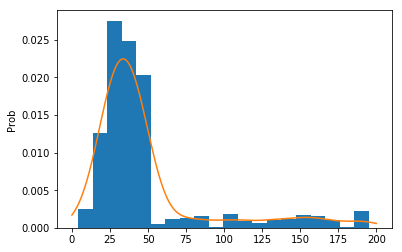

In [6]:
arr = np.loadtxt("smslen.txt")

from scipy import stats

kde = stats.gaussian_kde(arr)
xx = np.linspace(0, 200, 1000)
fig, ax = plt.subplots()
ax.hist(arr, normed=True, bins=20)
ax.plot(xx, kde(xx))
ax.set_ylabel("Prob")


In [5]:
kde(45)

array([0.017284])

([<matplotlib.axis.YTick at 0x1a1b0c6d30>,
 <a list of 5 Text yticklabel objects>)

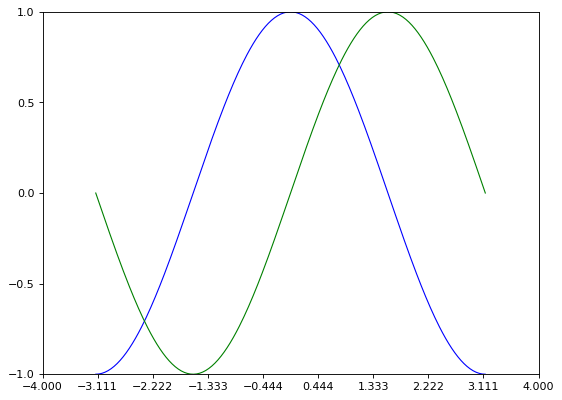

In [12]:
plt.figure(figsize=(8, 6), dpi=80)
plt.subplot(1, 1, 1)
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")
plt.xlim(-4.0, 4.0)
plt.xticks(np.linspace(-4, 4, 10, endpoint=True))
plt.ylim(-1.0, 1.0)
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

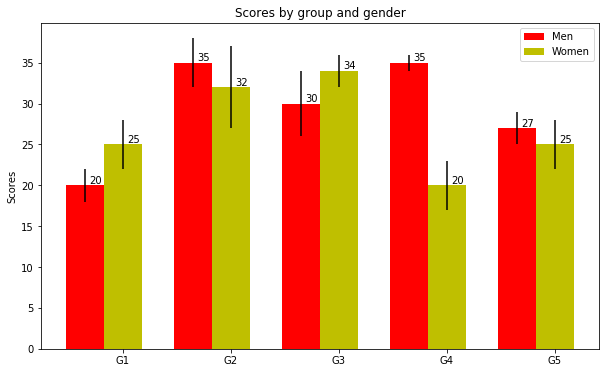

In [25]:
N = 5
menMeans = (20, 35, 30, 35, 27)
menStd =   (2, 3, 4, 1, 2)

ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
rects1 = ax.bar(ind, menMeans, width, color='r', yerr=menStd)

womenMeans = (25, 32, 34, 20, 25)
womenStd =   (3, 5, 2, 3, 3)
rects2 = ax.bar(ind+width, womenMeans, width, color='y', yerr=womenStd)

# add some text for labels, title and axes ticks
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('G1', 'G2', 'G3', 'G4', 'G5') )

ax.legend( (rects1[0], rects2[0]), ('Men', 'Women') )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2. + 0.1, 1*height, '%d'%int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

#plt.show()


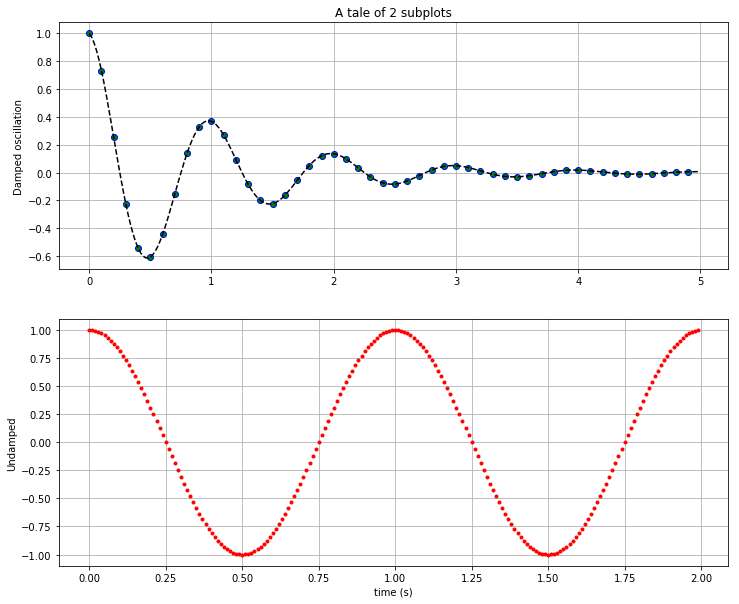

In [39]:
def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return np.multiply(s1,e1)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)
plt.figure(figsize=(12,10))
plt.subplot(211)
l = plt.plot(t1, f(t1), 'bo', t2, f(t2),'k--')
plt.setp(l, 'markerfacecolor', 'g')
plt.grid(True)
plt.title('A tale of 2 subplots')
plt.ylabel('Damped oscillation')


plt.subplot(212)
plt.plot(t3, np.cos(2*np.pi*t3), 'r.')
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()


<IPython.core.display.Javascript object>


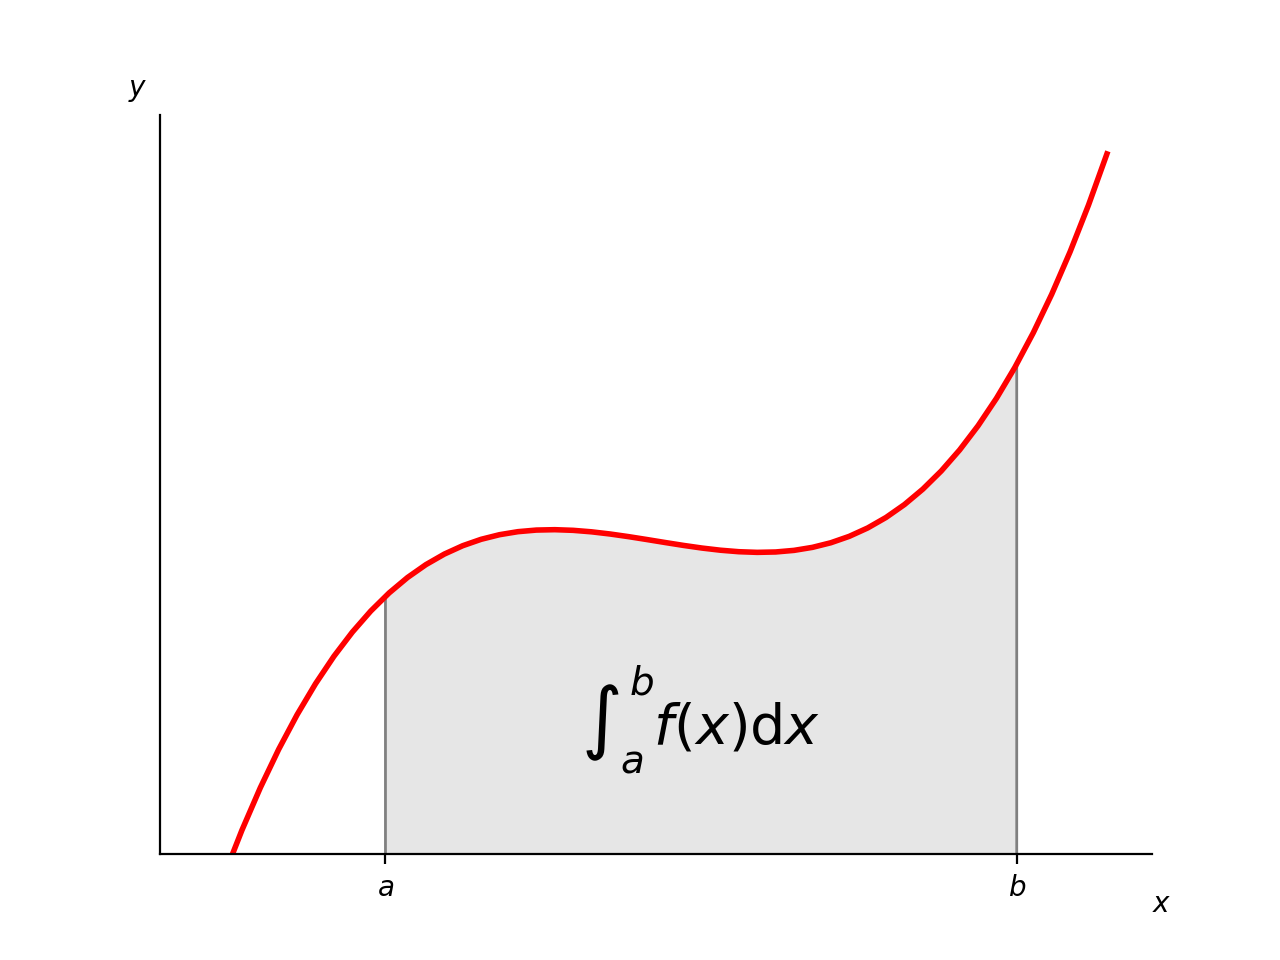

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon


def func(x):
    return (x - 3) * (x - 5) * (x - 7) + 85


a, b = 2, 9 # integral limits
x = np.linspace(0, 10)
y = func(x)

fig, ax = plt.subplots()
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(ymin=0)

# Make the shaded region
ix = np.linspace(a, b)
iy = func(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.5 * (a + b), 30, r"$\int_a^b f(x)\mathrm{d}x$",
         horizontalalignment='center', fontsize=20)

plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])

plt.show()




<IPython.core.display.Javascript object>


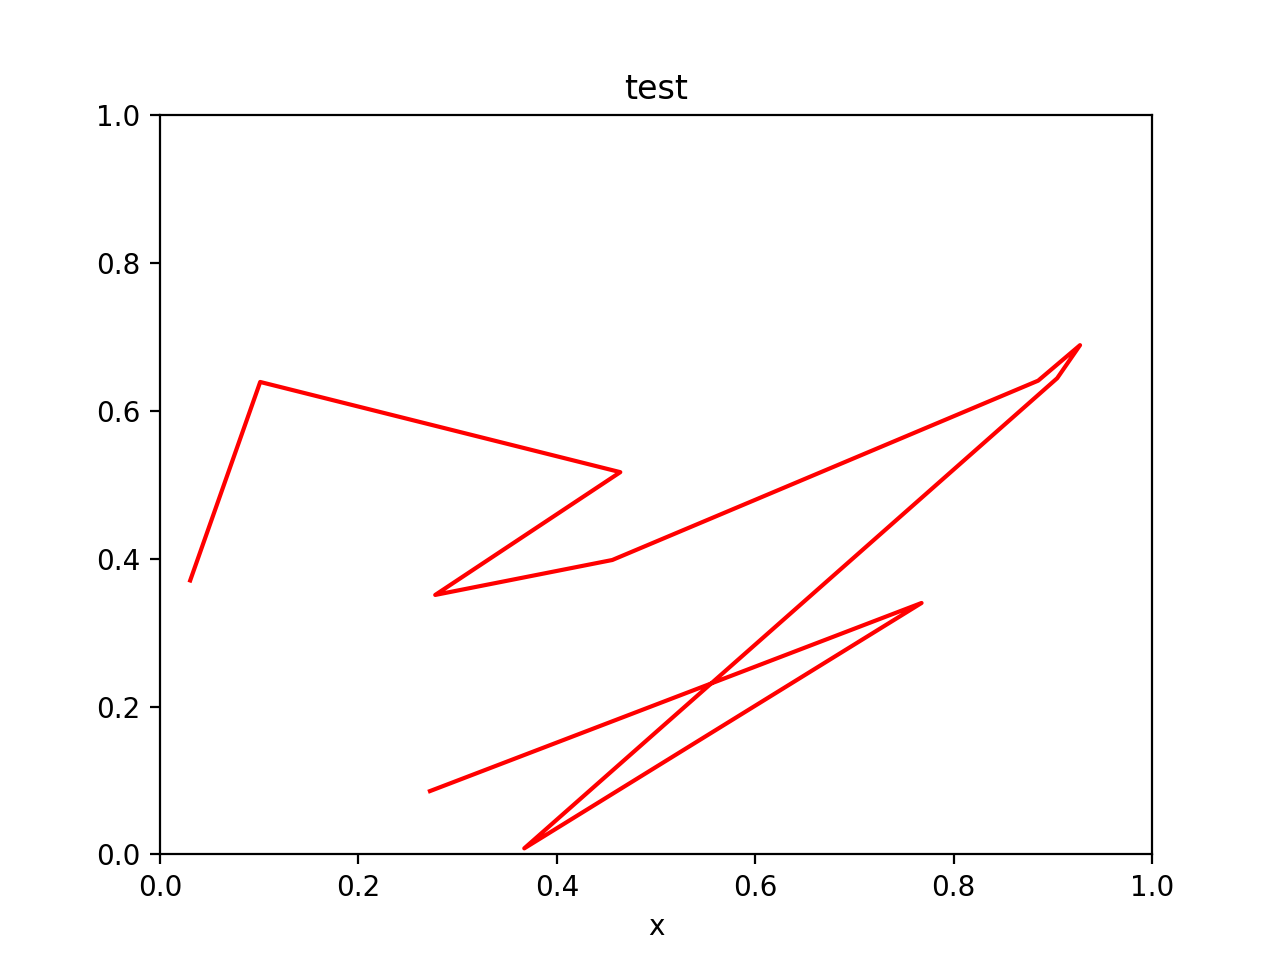

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

def update_line(num, data, line):
    line.set_data(data[...,:num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
    interval=300)


<IPython.core.display.Javascript object>


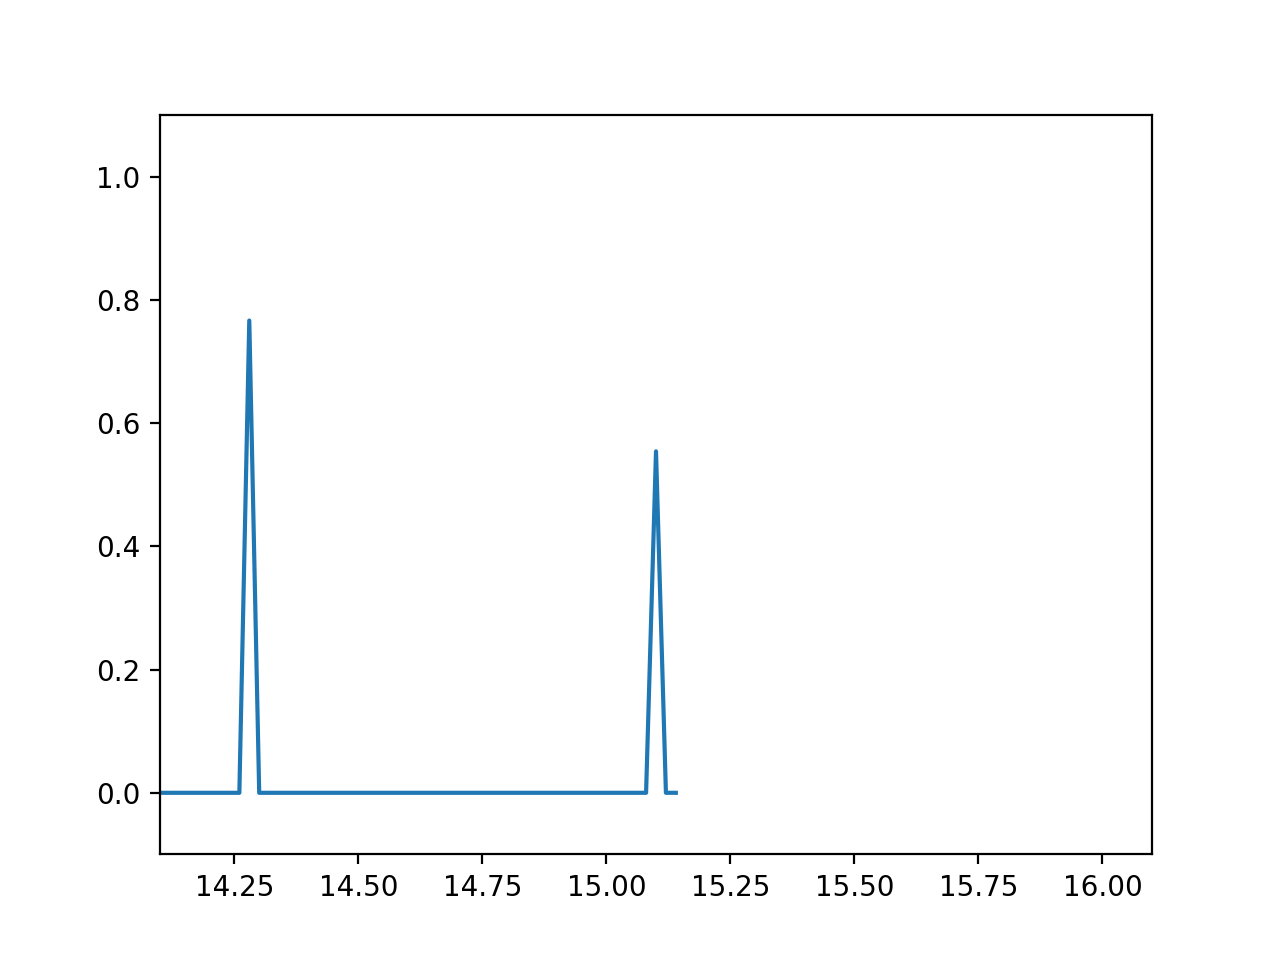

In [2]:
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

class Scope:
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt: # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,


def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)

fig, ax = plt.subplots()
scope = Scope(ax)

# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=10,
    blit=True)


plt.show()
